In [1]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

from google.colab import data_table
data_table.enable_dataframe_formatter()


In [3]:
# Read the CSV file
df = pd.read_csv("data.csv")
# Display the table
df

,index,ParticipantID,name,sex,studytime,freetime,romantic,Walc,goout,Parents_edu,absences,reason,G3,Pass,PredictedGrade,PredictedRank,StereotypeActivation,Predicted_Pass_PassFailStrategy,Predicted_Pass_RankingStrategy
0,132,1,Anna,F,1,2,no,1,2,4,0,course,15,True,17,4,None,True,True
1,724,1,Michael,M,1,1,no,4,4,4,1,reputation,11,True,10,7,None,True,False
2,637,1,David,M,1,2,no,4,2,2,0,other,11,True,13,6,None,True,True
3,884,1,Brian,M,1,1,no,4,4,3,7,home,9,False,10,8,None,True,False
4,194,1,Jenny,F,2,2,no,1,4,2,0,reputation,14,True,18,3,None,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,68,107,Anna,F,2,1,no,3,3,2,1,reputation,8,False,10,6,CaseBased,True,False
852,101,107,Oliver,M,3,3,yes,1,3,4,0,other,17,True,14,3,CaseBased,True,True
853,518,107,David,M,1,2,yes,1,2,4,7,course,8,False,7,8,CaseBased,False,False
854,111,107,Jenny,F,3,1,no,1,2,3,0,reputation,10,True,16,1,CaseBased,True,True


In [4]:
df['G_diff'] =  df['PredictedGrade'] - df['G3']
df['G_diff_abs'] =  (df['PredictedGrade'] - df['G3']).abs()

In [5]:
# Split the data based on the 'StereoType Activation' feature
split_data = df.groupby('StereotypeActivation')

# Create separate dataframes for each group
none_data = split_data.get_group('None').drop('StereotypeActivation', axis=1)
casebased_data = split_data.get_group('CaseBased').drop('StereotypeActivation', axis=1)
statistics_data = split_data.get_group('Statistics').drop('StereotypeActivation', axis=1)

# Create data for genders
casebased_split_data = casebased_data.groupby('sex')
f_casebased_data = casebased_split_data.get_group('F').drop('sex', axis=1)
m_casebased_data = casebased_split_data.get_group('M').drop('sex', axis=1)

none_data_split_data = none_data.groupby('sex')
f_none_data = none_data_split_data.get_group('F').drop('sex', axis=1)
m_none_data = none_data_split_data.get_group('M').drop('sex', axis=1)

statistics_data_split_data = statistics_data.groupby('sex')
f_statistics_data = statistics_data_split_data.get_group('F').drop('sex', axis=1)
m_statistics_data = statistics_data_split_data.get_group('M').drop('sex', axis=1)

# Create data for education levels
f_parent_edu_high_casebased_data = f_casebased_data[f_casebased_data['Parents_edu']>=3]
f_parent_edu_low_casebased_data = f_casebased_data[f_casebased_data['Parents_edu']<3]

m_parent_edu_high_casebased_data = m_casebased_data[m_casebased_data['Parents_edu']>=3]
m_parent_edu_low_casebased_data = m_casebased_data[m_casebased_data['Parents_edu']<3]


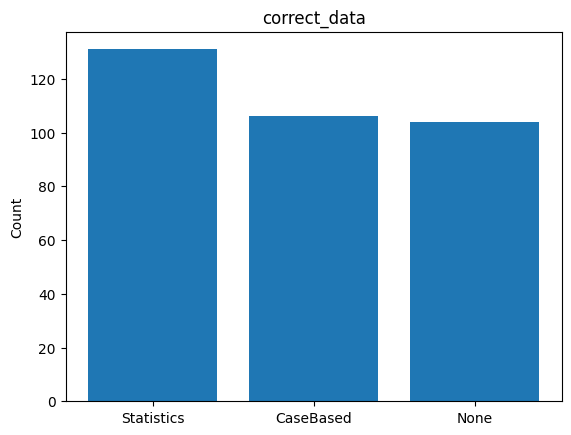

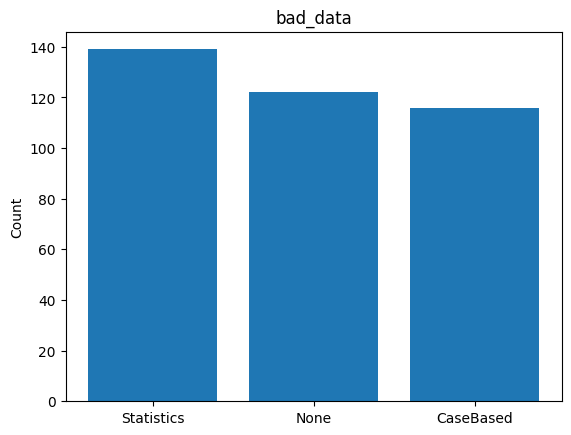

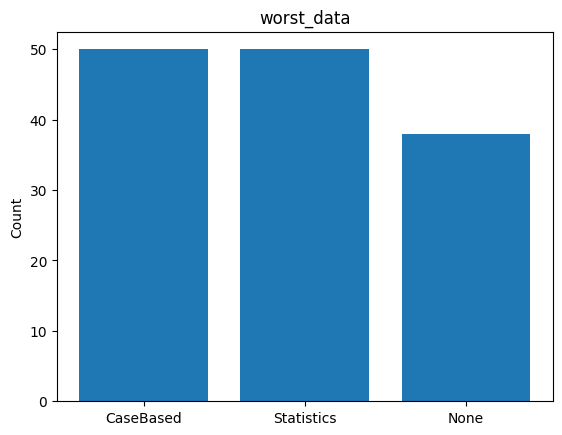

In [6]:
# Define the bin ranges and labels for splitting the data
bins = bins=[-float('inf'), 2.1, 6.5, float('inf')]
labels=['good','bad','worst']

# Create a new column 'G_diff_Category' to store the categories
df['G_diff_Category'] = pd.cut(df['G_diff_abs'], bins=bins, labels=labels)

# Split the data into three datasets based on the categories
correct_data = df[df['G_diff_Category'] == 'good']
bad_data = df[df['G_diff_Category'] == 'bad']
worst_data = df[df['G_diff_Category'] == 'worst']

for data,title in zip([correct_data, bad_data, worst_data],["correct_data", "bad_data", "worst_data"]):
  
  category_counts = data['StereotypeActivation'].value_counts()
  
  # Plot the bar chart
  plt.bar(category_counts.index, category_counts.values)
  plt.ylabel('Count')
  plt.title(title)
  plt.show()


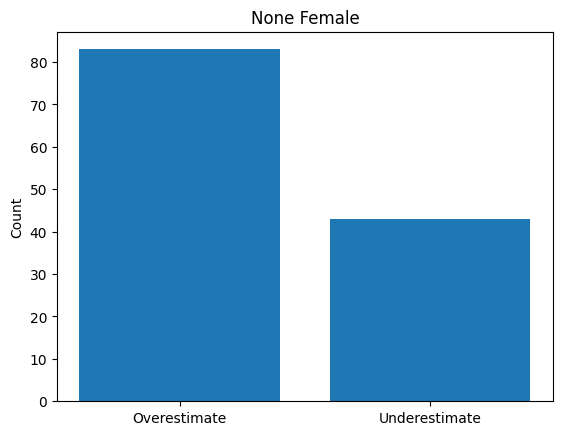

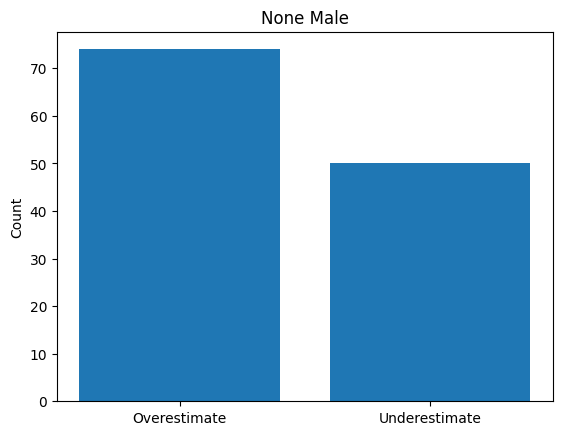

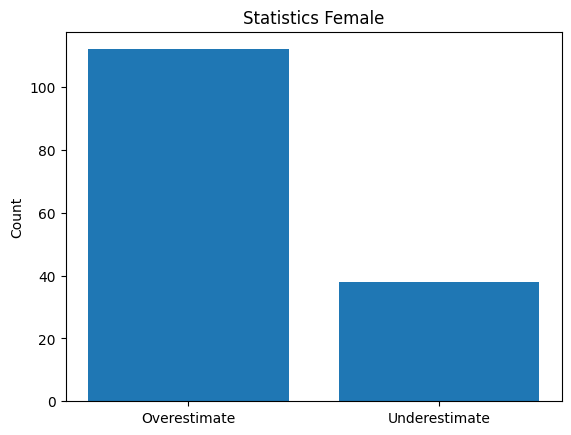

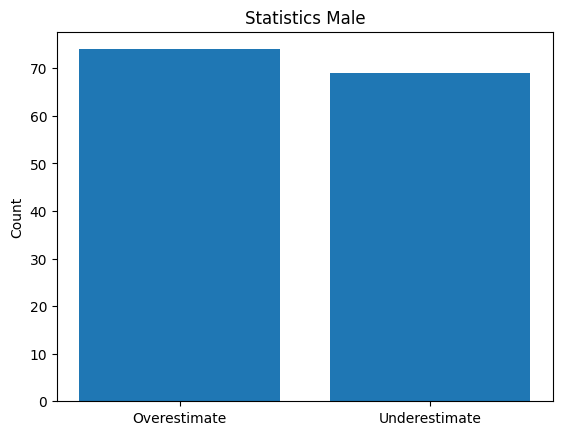

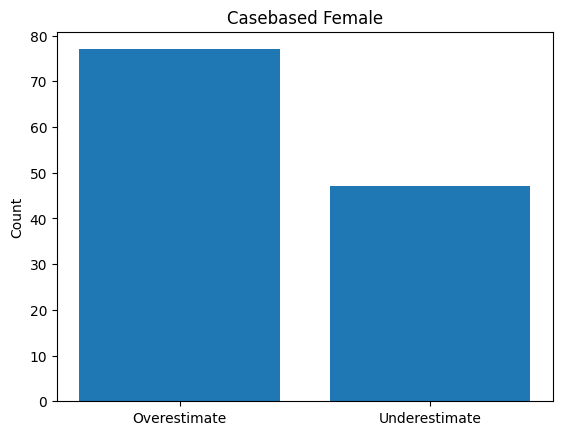

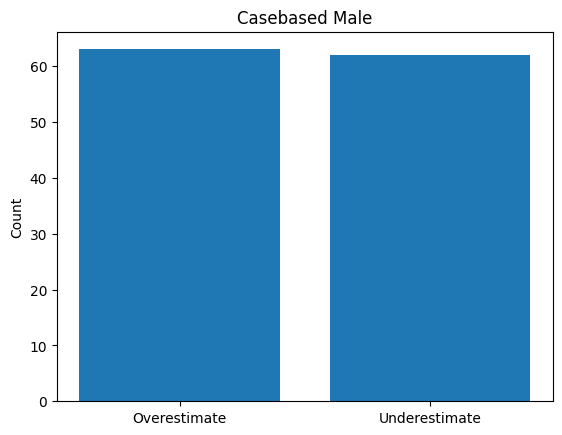

In [7]:
titles = ["None Female","None Male","Statistics Female", "Statistics Male","Casebased Female", "Casebased Male"]
for data,title in zip([f_none_data, m_none_data, f_statistics_data, m_statistics_data,f_casebased_data,m_casebased_data],titles):
  
  new_data = data.copy()

  # Exclude zeros
  new_data = data[data['G_diff'] != 0]

  categories = pd.cut(new_data['G_diff'], bins=[-float('inf'),0,float('inf')], labels=['Underestimate','Overestimate'])

  # Count the number of occurrences in each category
  category_counts = categories.value_counts()

  # Plot the bar chart
  plt.bar(category_counts.index, category_counts.values)
  plt.ylabel('Count')
  plt.title(title)
  plt.show()


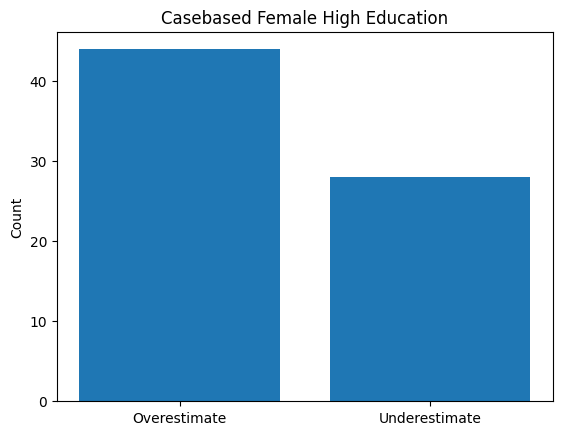

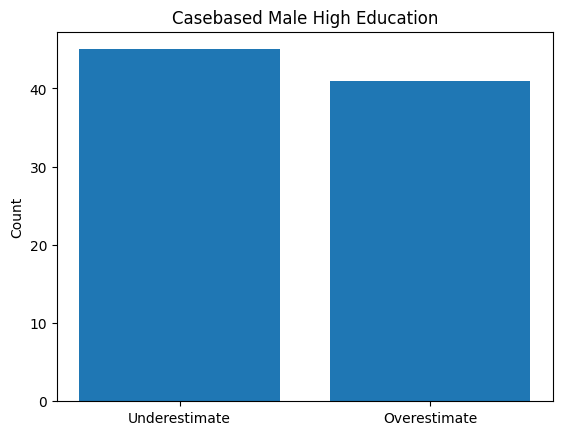

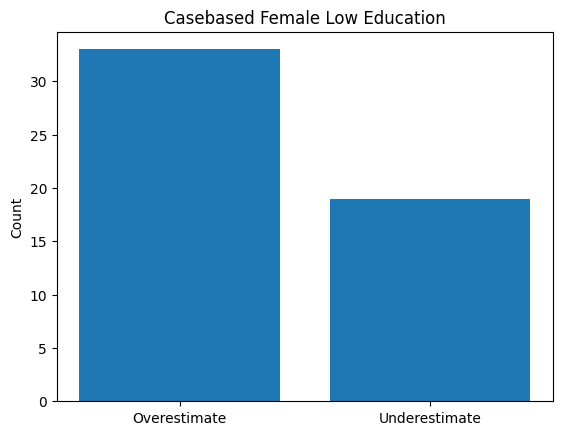

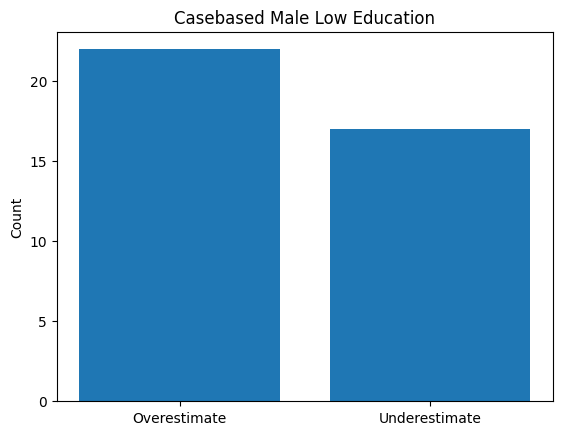

In [8]:
titles = ["Casebased Female High Education","Casebased Male High Education","Casebased Female Low Education","Casebased Male Low Education"]
for data,title in zip([f_parent_edu_high_casebased_data,m_parent_edu_high_casebased_data,f_parent_edu_low_casebased_data,m_parent_edu_low_casebased_data],titles):
  
  new_data = data.copy()
  # Exclude zeros
  new_data = data[data['G_diff'] != 0]

  categories = pd.cut(new_data['G_diff'], bins=[-float('inf'),0,float('inf')], labels=['Underestimate','Overestimate'])

  # Count the number of occurrences in each category
  category_counts = categories.value_counts()

  # Plot the bar chart
  plt.bar(category_counts.index, category_counts.values)
  plt.ylabel('Count')
  plt.title(title)
  plt.show()